# Speaker Gender Organize
- 20240910
There is no gender information in our current data, however, since we collected spearke id, and the dataset provides metadata regarding gender of speakers, we could therefore figure out gender of spearkers by matching speaker id with metadata. 

In [2]:
from paths import *
import pandas as pd
import os

In [6]:
text_dir = os.path.join(src_, 'SPEAKERS.TXT')

In [12]:
df = pd.read_csv(
    text_dir,  # Replace with the actual file path
    sep='|',                  # Specify that the separator is a pipe (|)
    skiprows=12,               # Skip the first 7 lines of comments
    engine='python',          # Use the Python engine to handle complex separators
    names=['ID', 'SEX', 'SUBSET', 'MINUTES', 'NAME'],  # Assign column names
    skipinitialspace=True     # Remove any leading spaces after the separator
)

# Display the DataFrame
df

,ID,SEX,SUBSET,MINUTES,NAME
0,14,F,train-clean-360,25.03,Kristin LeMoine
1,16,F,train-clean-360,25.11,Alys AtteWater
2,17,M,train-clean-360,25.04,Gord Mackenzie
3,19,F,train-clean-100,25.19,Kara Shallenberg
4,20,F,train-other-500,30.07,Gesine
...,...,...,...,...,...
2479,8975,F,train-clean-100,25.11,Daisy Flaim
2480,9000,M,train-other-500,27.26,Ramon Escamilla
2481,9022,F,train-clean-360,25.17,Claire M
2482,9023,F,train-clean-360,25.19,P. J. Morgan


We can see that the gender (SEX) and ID is very clearly defined in the metadata. We can use this information to determine the gender of speakers using speaker ID. 

In [15]:
# Now save it. 
df.to_csv(os.path.join(src_, 'speakers.csv'), index=False)

In [18]:
guide_path = os.path.join(src_, 'phi-ST-guide.csv')
guide = pd.read_csv(guide_path)

speaker_guide = pd.read_csv(os.path.join(src_, 'speakers.csv'))

In [20]:
guide_with_gender = pd.merge(guide, speaker_guide, left_on='speaker', right_on='ID', how='left')

In [21]:
guide_with_gender

,pre,stop,vowel,pre_path,stop_path,vowel_path,pre_startTime,pre_endTime,stop_startTime,stop_endTime,vowel_startTime,vowel_endTime,speaker,wuid,phi_type,ID,SEX,SUBSET,MINUTES,NAME
0,S,K,EY,103/1240/0001/103-1240-0001-0131.flac,103/1240/0001/103-1240-0001-0132.flac,103/1240/0001/103-1240-0001-0133.flac,10.57,10.67,10.67,10.74,10.74,10.92,103,103-1240-0001-0036,ST,103,F,train-clean-100,23.72,Karen Savage
1,S,K,UW,103/1240/0005/103-1240-0005-0016.flac,103/1240/0005/103-1240-0005-0017.flac,103/1240/0005/103-1240-0005-0018.flac,1.27,1.37,1.37,1.43,1.43,1.51,103,103-1240-0005-0004,ST,103,F,train-clean-100,23.72,Karen Savage
2,S,T,IY,103/1240/0005/103-1240-0005-0178.flac,103/1240/0005/103-1240-0005-0179.flac,103/1240/0005/103-1240-0005-0180.flac,14.44,14.52,14.52,14.59,14.59,14.65,103,103-1240-0005-0043,ST,103,F,train-clean-100,23.72,Karen Savage
3,S,K,IY,103/1240/0006/103-1240-0006-0011.flac,103/1240/0006/103-1240-0006-0012.flac,103/1240/0006/103-1240-0006-0013.flac,0.94,1.02,1.02,1.11,1.11,1.17,103,103-1240-0006-0002,ST,103,F,train-clean-100,23.72,Karen Savage
4,S,T,IY,103/1240/0006/103-1240-0006-0090.flac,103/1240/0006/103-1240-0006-0091.flac,103/1240/0006/103-1240-0006-0092.flac,7.71,7.84,7.84,7.89,7.89,7.99,103,103-1240-0006-0027,ST,103,F,train-clean-100,23.72,Karen Savage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,S,T,EY,909/131045/0038/909-131045-0038-0111.flac,909/131045/0038/909-131045-0038-0112.flac,909/131045/0038/909-131045-0038-0113.flac,9.73,9.79,9.79,9.88,9.88,10.00,909,909-131045-0038-0028,ST,909,M,train-clean-100,25.00,Greg Bryant
2359,S,P,OW,909/131045/0039/909-131045-0039-0039.flac,909/131045/0039/909-131045-0039-0040.flac,909/131045/0039/909-131045-0039-0041.flac,3.64,3.70,3.70,3.78,3.78,3.92,909,909-131045-0039-0012,ST,909,M,train-clean-100,25.00,Greg Bryant
2360,S,T,IH,909/131045/0040/909-131045-0040-0033.flac,909/131045/0040/909-131045-0040-0034.flac,909/131045/0040/909-131045-0040-0035.flac,3.22,3.29,3.29,3.36,3.36,3.41,909,909-131045-0040-0008,ST,909,M,train-clean-100,25.00,Greg Bryant
2361,S,T,AE,909/131045/0042/909-131045-0042-0020.flac,909/131045/0042/909-131045-0042-0021.flac,909/131045/0042/909-131045-0042-0022.flac,1.74,1.82,1.82,1.89,1.89,1.99,909,909-131045-0042-0004,ST,909,M,train-clean-100,25.00,Greg Bryant


In [1]:
from sklearn.metrics import adjusted_rand_score

# True labels (ground truth)
true_labels = [0, 0, 1, 1, 2, 2, 3, 3]

# Predicted labels from a clustering algorithm
predicted_labels_1 = [0, 0, 1, 1, 2, 2, 3, 3]  # Perfect clustering
predicted_labels_2 = [0, 0, 2, 2, 1, 1, 3, 3]  # Imperfect clustering
predicted_labels_3 = [1, 1, 0, 0, 3, 3, 2, 2]  # Random clustering

# Calculate ARI for each clustering result
ari_1 = adjusted_rand_score(true_labels, predicted_labels_1)
ari_2 = adjusted_rand_score(true_labels, predicted_labels_2)
ari_3 = adjusted_rand_score(true_labels, predicted_labels_3)

print(f"ARI for perfect clustering: {ari_1}")
print(f"ARI for imperfect clustering: {ari_2}")
print(f"ARI for random clustering: {ari_3}")


ARI for perfect clustering: 1.0
ARI for imperfect clustering: 1.0
ARI for random clustering: 1.0


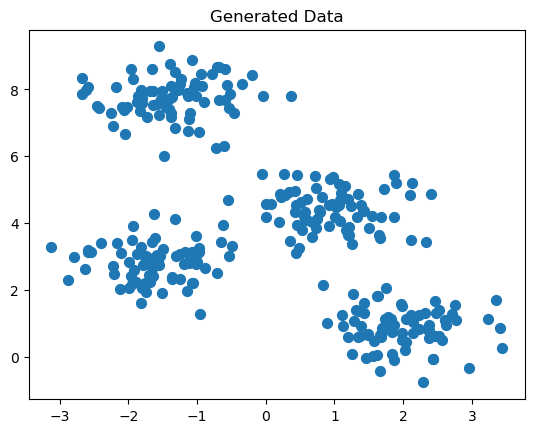

/home/franklhtan/anaconda3/envs/wavln/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ARI for K-means clustering: 1.0


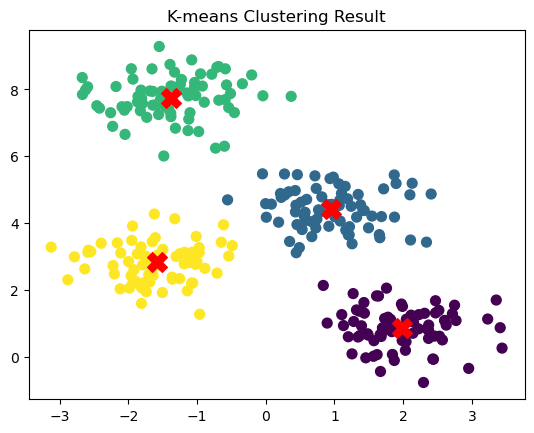

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Generate sample data with 4 clusters
X, true_labels = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the sample data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
predicted_labels = kmeans.fit_predict(X)

# Calculate ARI
ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"ARI for K-means clustering: {ari}")

# Plot the K-means clustering result
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-means Clustering Result")
plt.show()


In [3]:
import numpy as np
from sklearn.cluster import KMeans

# Example NumPy array with data points
X = np.array([[1.1, 2.2], [1.2, 2.3], [3.1, 3.2], [8.1, 8.2], [9.2, 9.3]])

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
predicted_labels = kmeans.fit_predict(X)

# Output predicted cluster labels
print(predicted_labels)


[1 1 1 0 0]


/home/franklhtan/anaconda3/envs/wavln/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


: 

In [2]:
x = {"a": 1, "b": 2}

In [5]:
list(x.values()), list(x.keys())

([1, 2], ['a', 'b'])

: 

In [1]:
import plotly.graph_objs as go
import numpy as np
import scipy.stats as stats

def plot_many_plotly(arrs, labels, save_path, plot_label_dict={"xlabel": "Epoch", "ylabel": "Value", "title": "Value Across Epochs"}, y_range=None, cloud=True):
    n_steps = arrs[0].shape[1]
    mean_trajs = []
    lower_bounds = []
    upper_bounds = []
    colors = [
        "#da1e28", "#f1c21b", "#ff832b", "#198038",
        "#edf5ff", "#f6f2ff", "#d9fbfb", 
        "#a6c8ff", "#d4bbff", "#3ddbd9", 
        "#4589ff", "#a56eff", "#009d9a",
        "#0043ce", "#6929c4", "#005d5d",
        "#001d6c", "#31135e", "#022b30", "black"
    ]

    for arr in arrs:
        assert arr.shape[1] == n_steps
        mean_traj = np.mean(arr, axis=0)
        sem_arr = stats.sem(arr, axis=0)
        ci_95 = 1.96 * sem_arr
        upper_bound = mean_traj + ci_95
        lower_bound = mean_traj - ci_95
        mean_trajs.append(mean_traj)
        lower_bounds.append(lower_bound)
        upper_bounds.append(upper_bound)

    # Create Plotly traces
    fig = go.Figure()
    for idx, (mean_traj, lower_bound, upper_bound, label) in enumerate(zip(mean_trajs, lower_bounds, upper_bounds, labels)):
        # Add mean line
        fig.add_trace(go.Scatter(
            x=list(range(n_steps)),
            y=mean_traj,
            mode='lines',
            name=label,
            line=dict(color=colors[idx]),
        ))
        # Add confidence interval shading if cloud is True
        if cloud:
            fig.add_trace(go.Scatter(
                x=list(range(n_steps)) + list(range(n_steps))[::-1],
                y=np.concatenate([upper_bound, lower_bound[::-1]]),
                fill='toself',
                fillcolor=colors[idx],
                line=dict(color='rgba(255,255,255,0)'),
                showlegend=False,
                opacity=0.2,
            ))

    # Update layout
    fig.update_layout(
        title=plot_label_dict["title"],
        xaxis_title=plot_label_dict["xlabel"],
        yaxis_title=plot_label_dict["ylabel"],
        yaxis=dict(range=y_range if y_range is not None else [None, None]),
        legend_title="Trajectories",
        template="plotly_white"
    )
    
    # Save to HTML file
    fig.write_html(save_path)

# Generate the HTML file
arrs = [np.random.randn(10, 100) for _ in range(3)]  # Example arrays
labels = ['Trajectory 1', 'Trajectory 2', 'Trajectory 3']
plot_many_plotly(arrs, labels, "./plot_interactive.html")


ModuleNotFoundError: No module named 'plotly'